In [109]:
# Zone d'importation
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import RobustScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
os.getcwd()

'C:\\Users\\King Afolabi\\Desktop\\MTN Academy\\Projets\\Golden projet'

In [3]:
# Chargement du dataset avec pandas en lui donnant date pour index

data = pd.read_csv('FINAL_USO.csv', parse_dates = True, index_col="Date") 

# 1. Analyse exploratoire

### a. Identification de la Target

La target variable est Adj Close

### b. Nombre de lignes et colonnes

In [4]:
# Création et Affichage d'une copy du dataset

golden_data = data.copy()
golden_data

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,122.180000,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,121.589996,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,120.290001,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,123.930000,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,124.169998,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24,119.570000,120.139999,119.570000,120.019997,120.019997,9736400,239.039993,240.839996,234.270004,234.339996,...,20.650000,21.090000,21.090000,60507000,9.490000,9.520000,9.280000,9.290000,9.290000,21598200
2018-12-26,120.620003,121.000000,119.570000,119.660004,119.660004,14293500,235.970001,246.179993,233.759995,246.179993,...,20.530001,20.620001,20.620001,76365200,9.250000,9.920000,9.230000,9.900000,9.900000,40978800
2018-12-27,120.570000,120.900002,120.139999,120.570000,120.570000,11874400,242.570007,248.289993,238.960007,248.070007,...,20.700001,20.969999,20.969999,52393000,9.590000,9.650000,9.370000,9.620000,9.620000,36578700


Le nombre de lignes et de colonne est : (1718, 80)

### c. Identification des valeurs manquantes

In [5]:
golden_data.isnull().sum()

Open             0
High             0
Low              0
Close            0
Adj Close        0
                ..
USO_High         0
USO_Low          0
USO_Close        0
USO_Adj Close    0
USO_Volume       0
Length: 80, dtype: int64

Il n'y a pas de valeurs manquantes

### d. Types de variables

In [6]:
golden_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1718 entries, 2011-12-15 to 2018-12-31
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Open           1718 non-null   float64
 1   High           1718 non-null   float64
 2   Low            1718 non-null   float64
 3   Close          1718 non-null   float64
 4   Adj Close      1718 non-null   float64
 5   Volume         1718 non-null   int64  
 6   SP_open        1718 non-null   float64
 7   SP_high        1718 non-null   float64
 8   SP_low         1718 non-null   float64
 9   SP_close       1718 non-null   float64
 10  SP_Ajclose     1718 non-null   float64
 11  SP_volume      1718 non-null   int64  
 12  DJ_open        1718 non-null   float64
 13  DJ_high        1718 non-null   float64
 14  DJ_low         1718 non-null   float64
 15  DJ_close       1718 non-null   float64
 16  DJ_Ajclose     1718 non-null   float64
 17  DJ_volume      1718 non-null   int

Nous avons dans ce dataset des float64 (Réel) au nombre de 58 et des int64 (Entier) au npmbre de 22.

### e. Visualisation de la cible (Target)

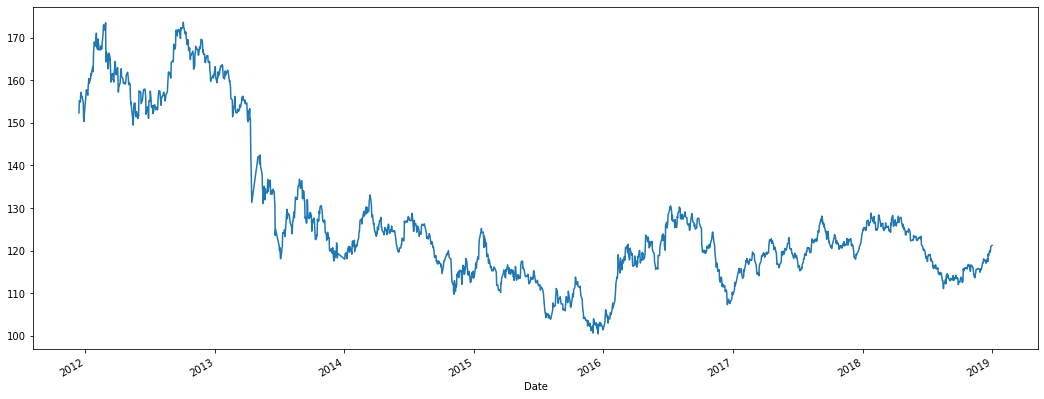

In [7]:
# Visualisation de la variable cible

golden_data["Adj Close"].plot(figsize=(18,7))
plt.show()

### f. Comprehension des différentes variables 

#### Définition des indices boursiers

#### . SP
Le S&P 500 (SP) est un indice boursier basé sur 500 grandes sociétés cotées sur les bourses aux États-Unis (NYSE ou NASDAQ). L'indice est possédé et géré par Standard & Poor's, l'une des trois principales sociétés de notation financière. Il couvre environ 80 % du marché boursier américain par sa capitalisation. C'est un indice sans dividendes.

#### . DJ
Le Dow Jones Industrial Average (abrégé en DJIA et souvent raccourci en Dow Jones) est le plus vieil indice des bourses de New York et le plus vieil indice boursier du monde. Cet indice est la propriété de Dow Jones Indexes, une coentreprise détenue à 90 % par CME Group et à 10 % par Dow Jones and Company.

#### . EG
Eldorado Gold Corporation (EGO) est une compagnie publique dont le siège social est basé à Vancouver (Canada) active dans le secteur minier, l'exploration et le développement de propriétés minières aurifères tant en Europe, en Asie que dans les deux Amériques soit plus précisément en Turquie, en Grèce, au Canada, en Roumanie et au Brésil.

#### . EU
Le taux de change EUR/USD est le cours de l'euro chiffré en dollar US, d'où la barre de fraction (ne pas confondre avec les eurodollars).
C'est l'instrument financier le plus actif et le plus traité du monde : 27 % du total des opérations spot. Sa valeur est donc un indicateur suivi en permanence non seulement par les milieux économiques et financiers, mais aussi par les médias, tant spécialisés que généralistes, du monde entier.
Cette définition est en fait, la valeur externe de l'euro par rapport au dollar américain.
Exemple : Si le taux de change EUR/USD côte 1,4 cela signifie que 1 € = 1,4 $.

#### . OF

un contrat à terme sur le pétrole est un contrat financier qui permet de vendre en avance un actif sous-jacent (ici le pétrole) qui sera livré à la date d'échéance du contrat. 
Historiquement, les contrats à terme ont été créés pour permettre aux agriculteurs, et plus largement aux producteurs de matières premières, de vendre en avance leur production afin d'avoir plus de visibilité sur leur trésorerie. Ils peuvent ainsi garantir leurs revenus futurs en se protégeant de la variation des prix liée à la spéculation.

Le brent est un type de pétrole brut utilisé comme standard dans la fixation du prix du brut et comme matière première pour les contrats à terme sur le pétrole.
Le Brent sert comme référence de prix pour le pétrole d'Europe, d'Afrique et du Moyen-Orient.

#### . OS

Le West Texas Intermediate (WTI) est un mélange de plusieurs pétroles bruts légers américains. Il est extrait et transformé aux États-Unis, et est généralement raffiné dans les régions du Midwest et du golfe du Mexique. Le WTI est principalement utilisé comme la valeur de référence du marché pétrolier américain.

#### . SF

un contrat à terme sur l'argent.

#### . USB

Les obligations sont une forme d’investissement financier qui implique de prêter de l’argent à une institution contre un taux d'intérêt convenu. Elles sont utilisées par les États pour financer de nouveaux projets ou de nouvelles infrastructures. Les investisseurs, quant à eux, perçoivent des intérêts définis, à intervalles réguliers. 
Ce sont  les données du taux des obligations des USA.

#### . PL

Le prix du platine.

#### . PLD

Le prix du palladium.

#### . RHO

RHOPRICE
Le prix du rhodium.

#### . USDI

Le prix de l'indice du dollar américain.

#### . GDX

L'ETF Gold Miners
GDX, ou VanEck Vectors® Gold Miners, est un ETF négocié sur le NYSE Arca (New York Stock Exchange Archipelago Exchange). Par définition, un ETF est un fonds d'investissement qui détient un panier d'actions individuelles, trading de matières premières, trading des obligations ou d'autres investissements.

#### . USO

L'ETF pétrolier USO sont utilisés comme variables d'ingénierie de caractéristiques.
Le fonds pétrolier des États-Unis est un produit négocié en bourse dont les actions se négocient sur le New York Stock Exchange Arca. L'objectif du fonds est que les variations quotidiennes en pourcentage reflètent les variations quotidiennes en pourcentage du prix au comptant du pétrole brut léger non corrosif.

## g. Visualisation feature/target 

In [8]:
for col in golden_data :
    print(golden_data[col].describe(),"\n \n",'- -'*20, "\n")

count    1718.000000
mean      127.323434
std        17.526993
min       100.919998
25%       116.220001
50%       121.915001
75%       128.427494
max       173.199997
Name: Open, dtype: float64 
 
 - -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- - 

count    1718.000000
mean      127.854237
std        17.631189
min       100.989998
25%       116.540001
50%       122.325001
75%       129.087498
max       174.070007
Name: High, dtype: float64 
 
 - -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- - 

count    1718.000000
mean      126.777695
std        17.396513
min       100.230003
25%       115.739998
50%       121.369999
75%       127.840001
max       172.919998
Name: Low, dtype: float64 
 
 - -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- - 

count    1718.000000
mean      127.319482
std        17.536269
min       100.500000
25%       116.052502
50%       121.795002
75%       128.470001
max       173.610001
Name: Close, dtype: float64 
 
 - -- -- -- -- -

In [9]:
# Segmentation. J'ai rétiré le volume et le trend (tendance)

data_delete = golden_data.drop(["USDI_Trend","USB_Trend","PLT_Trend","PLD_Trend","EU_Trend","OF_Trend","OS_Trend","SF_Trend","Volume", "SP_volume", "DJ_volume", "EG_volume", "OF_Volume", "SF_Volume", "USDI_Volume", "GDX_Volume", "USO_Volume"], axis=1)
data_delete

,Open,High,Low,Close,Adj Close,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,...,GDX_Open,GDX_High,GDX_Low,GDX_Close,GDX_Adj Close,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close
Date,,,,,,,,,,,,,,,,,,,,,
2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,123.029999,123.199997,121.989998,122.180000,105.441238,...,53.009998,53.139999,51.570000,51.680000,48.973877,36.900002,36.939999,36.049999,36.130001,36.130001
2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,122.230003,122.949997,121.300003,121.589996,105.597549,...,52.500000,53.180000,52.040001,52.680000,49.921513,36.180000,36.500000,35.730000,36.270000,36.270000
2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,122.059998,122.320000,120.029999,120.290001,104.468536,...,52.490002,52.549999,51.029999,51.169998,48.490578,36.389999,36.450001,35.930000,36.200001,36.200001
2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,122.180000,124.139999,120.370003,123.930000,107.629784,...,52.380001,53.250000,52.369999,52.990002,50.215282,37.299999,37.610001,37.220001,37.560001,37.560001
2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,123.930000,124.360001,122.750000,124.169998,107.838242,...,53.150002,53.430000,52.419998,52.959999,50.186852,37.669998,38.240002,37.520000,38.110001,38.110001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24,119.570000,120.139999,119.570000,120.019997,120.019997,239.039993,240.839996,234.270004,234.339996,234.339996,...,20.700001,21.110001,20.650000,21.090000,21.090000,9.490000,9.520000,9.280000,9.290000,9.290000
2018-12-26,120.620003,121.000000,119.570000,119.660004,119.660004,235.970001,246.179993,233.759995,246.179993,246.179993,...,21.350000,21.400000,20.530001,20.620001,20.620001,9.250000,9.920000,9.230000,9.900000,9.900000
2018-12-27,120.570000,120.900002,120.139999,120.570000,120.570000,242.570007,248.289993,238.960007,248.070007,248.070007,...,20.840000,21.000000,20.700001,20.969999,20.969999,9.590000,9.650000,9.370000,9.620000,9.620000


In [10]:
liste_1 = []

for col in data_delete :
    
    liste_1.append(col)
    

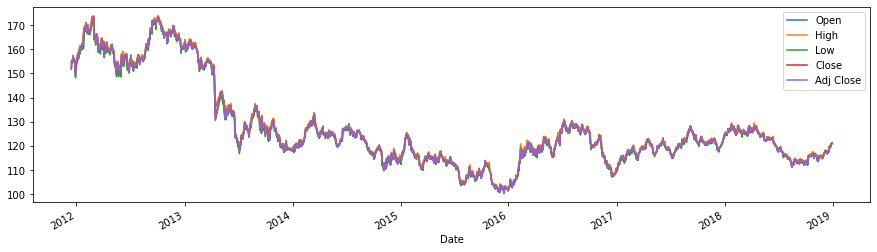

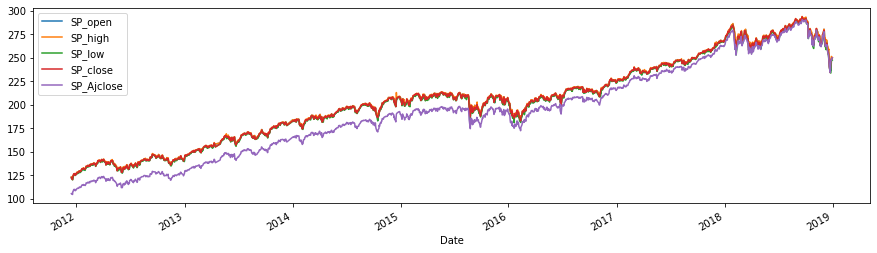

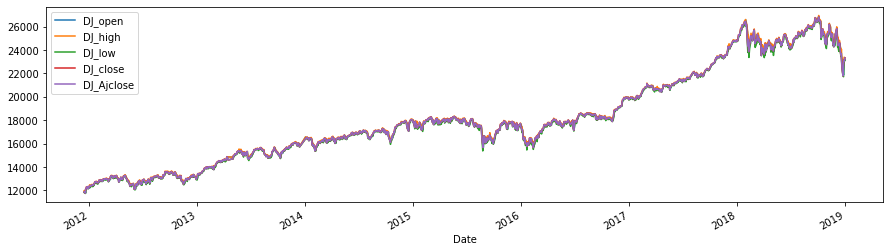

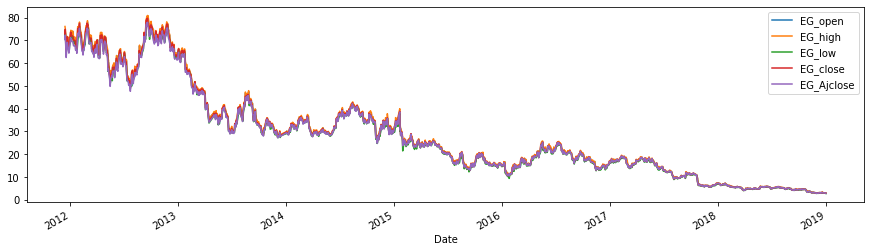

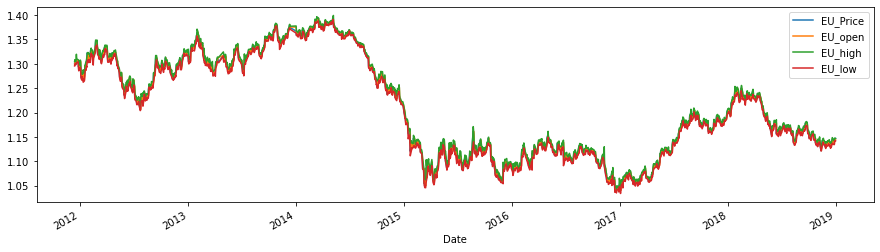

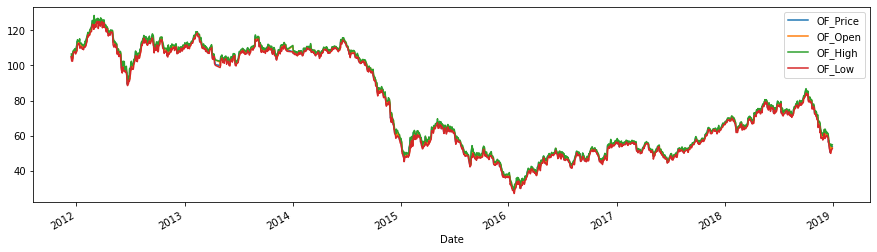

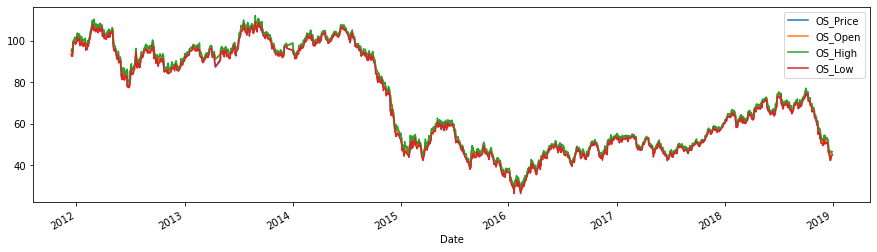

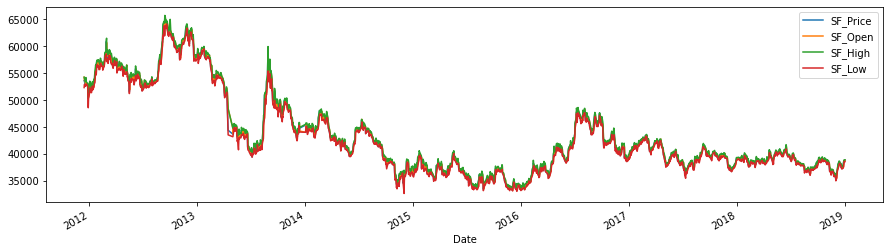

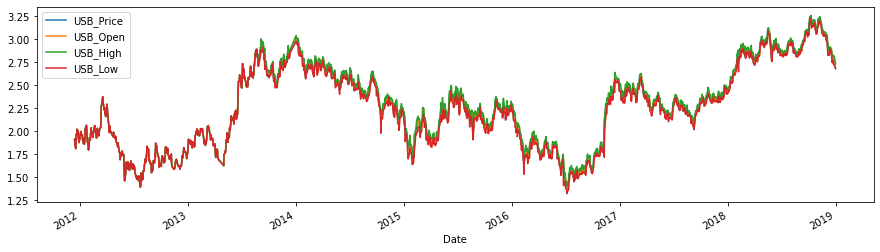

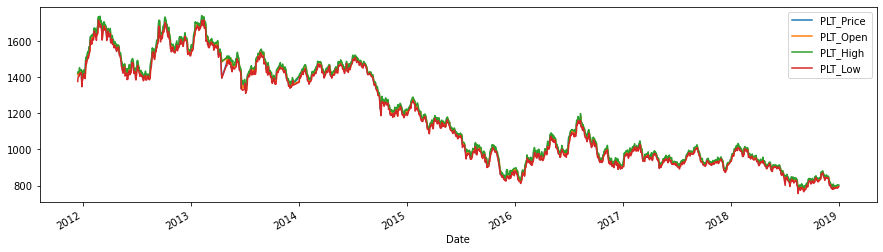

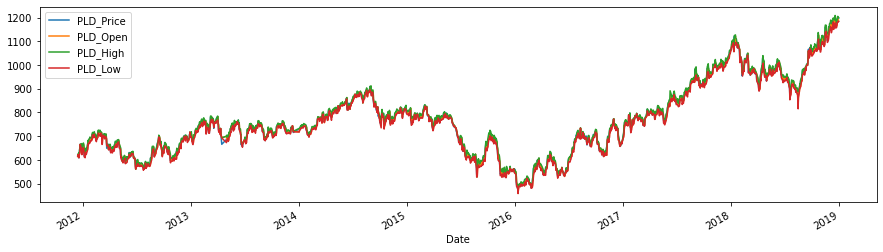

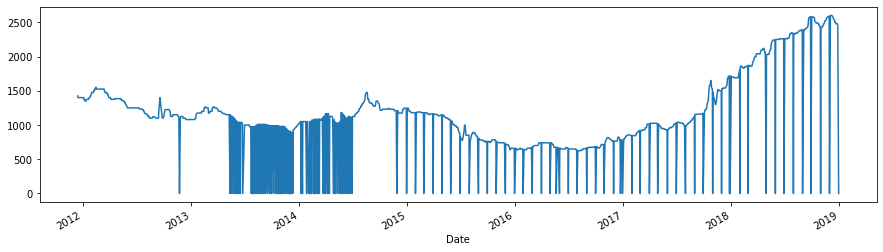

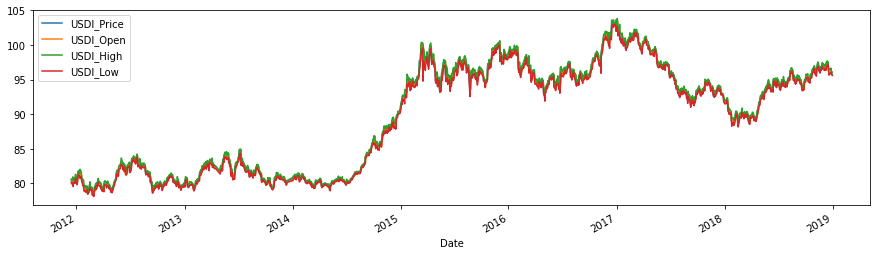

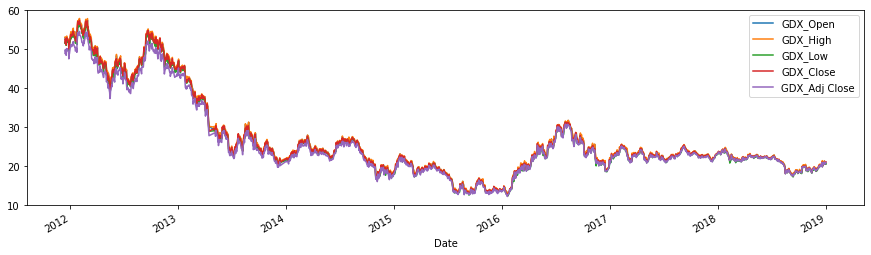

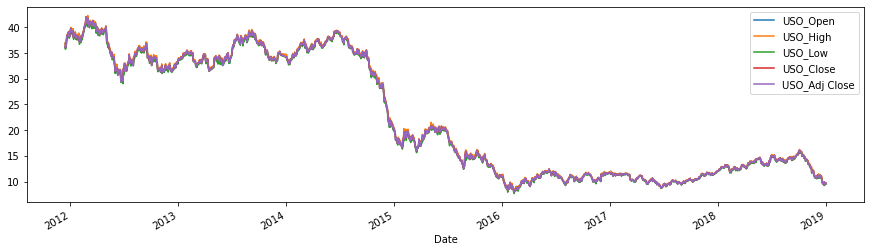

In [11]:
# Visualisation de la variable cible et des autres elts de sa catégorie.

j,k = 15,4
for i in range(0,20,5):
    golden_data[liste_1[i:i+5]].plot(figsize=(j,k))

for i in range(20,48,4):
    golden_data[liste_1[i:i+4]].plot(figsize=(j,k))


plt.figure()
golden_data[liste_1[48]].plot(figsize=(j,k))

golden_data[liste_1[49:53]].plot(figsize=(j,k))

for i in range(53,63,5):
    golden_data[liste_1[i:i+5]].plot(figsize=(j,k))


plt.show()

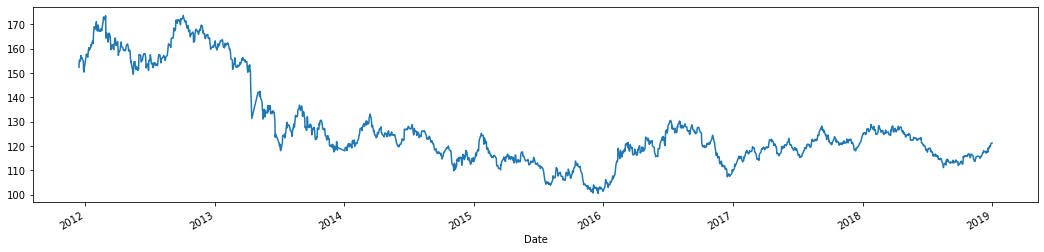

In [12]:
plt.figure()
golden_data["Adj Close"].plot(figsize=(18,4))
plt.show()

In [13]:
data_trend = golden_data[["EU_Trend","OF_Trend","OS_Trend","SF_Trend","USB_Trend","PLT_Trend","PLD_Trend","USDI_Trend"]]
data_trend

,EU_Trend,OF_Trend,OS_Trend,SF_Trend,USB_Trend,PLT_Trend,PLD_Trend,USDI_Trend
Date,,,,,,,,
2011-12-15,1,1,0,1,1,0,1,0
2011-12-16,1,0,1,0,0,1,1,0
2011-12-19,0,1,1,0,0,0,0,0
2011-12-20,1,1,1,1,1,1,1,1
2011-12-21,0,1,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...
2018-12-24,1,0,0,1,0,0,1,0
2018-12-26,0,1,1,1,1,1,1,1
2018-12-27,1,0,0,1,0,0,1,0


In [14]:
data_vol = golden_data[["Volume", "SP_volume", "DJ_volume", "EG_volume", "OF_Volume", "SF_Volume", "USDI_Volume", "GDX_Volume", "USO_Volume"]]
data_vol

,Volume,SP_volume,DJ_volume,EG_volume,OF_Volume,SF_Volume,USDI_Volume,GDX_Volume,USO_Volume
Date,,,,,,,,,
2011-12-15,21521900,199109200,136930000,787900,14330,119440,22850,20605600,12616700
2011-12-16,18124300,220481400,389520000,896600,140080,65390,13150,16285400,12578800
2011-12-19,12547200,183903000,135170000,2096700,147880,67280,970,15120200,7418200
2011-12-20,9136300,225418100,165180000,875300,170240,55130,22950,11644900,10041600
2011-12-21,11996100,194230900,163250000,837600,145090,75950,24140,8724300,10728000
...,...,...,...,...,...,...,...,...,...
2018-12-24,9736400,147311600,308420000,655100,76220,9460,13930,60507000,21598200
2018-12-26,14293500,218485400,433080000,746300,77000,19410,15660,76365200,40978800
2018-12-27,11874400,186267300,407940000,744000,102590,19650,20520,52393000,36578700


<AxesSubplot:>

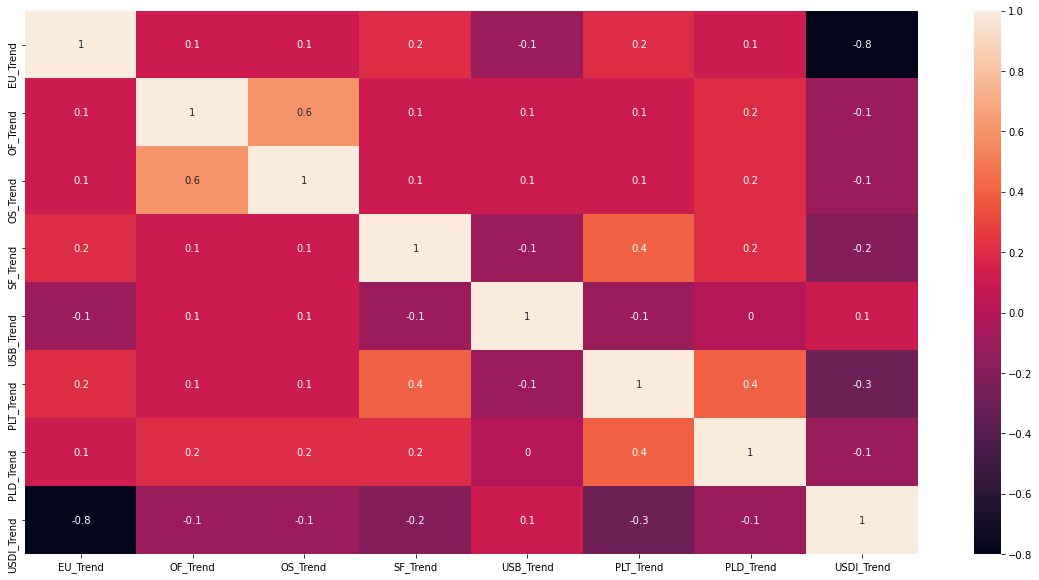

In [15]:

plt.figure(figsize=(20,10))
sns.heatmap(data=data_trend.corr().round(1), annot=True)

<AxesSubplot:>

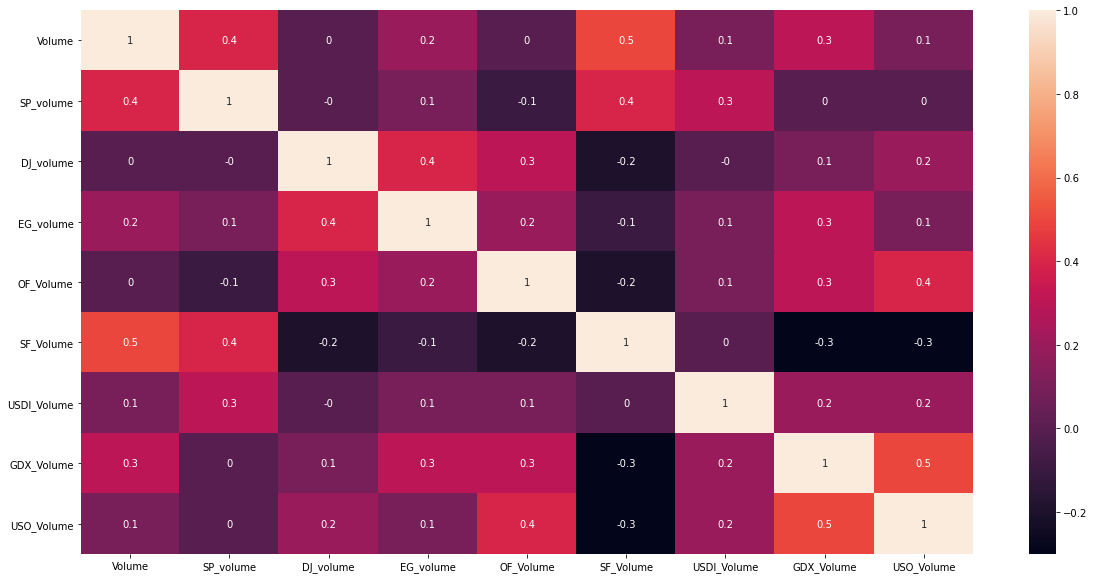

In [16]:
plt.figure(figsize=(20,10))
sns.heatmap(data=data_vol.corr().round(1), annot=True)

Normalisation 

In [112]:
scaler = RobustScaler()
normal = scaler.fit_transform(golden_data)
golden_data = pd.DataFrame(normal, columns=golden_data.columns, index = golden_data.index)

Division du dataset en test et train

In [113]:
X = golden_data.drop("Adj Close", axis=1)
y = golden_data["Adj Close"]

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [115]:
X_train

,Open,High,Low,Close,Volume,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2014-10-14,-0.273193,-0.279339,-0.249587,-0.258104,-0.481562,-0.254783,-0.249251,-0.261229,-0.268151,-0.254930,...,-0.254560,-0.250278,-0.312195,-0.036140,0.672174,0.659760,0.639632,0.629967,0.629967,-0.035447
2015-04-22,-0.580381,-0.586970,-0.628099,-0.641433,-0.372866,0.067937,0.065758,0.067147,0.076700,0.048817,...,-0.552581,-0.556257,-0.609712,0.436228,0.130870,0.130571,0.141166,0.130945,0.130945,0.056823
2018-12-17,-0.372312,-0.342300,-0.332231,-0.316086,0.202502,0.806203,0.811714,0.737569,0.749408,0.821989,...,-0.402018,-0.363163,-0.345562,0.866383,-0.241739,-0.247113,-0.246822,-0.256026,-0.256026,1.171033
2016-10-21,-0.083146,-0.111178,-0.067768,-0.077713,-0.161855,0.125785,0.114140,0.125131,0.127082,0.173349,...,0.237485,0.232455,0.245629,-0.087279,-0.219565,-0.221647,-0.206488,-0.211292,-0.211292,1.147988
2017-09-08,0.515667,0.476191,0.514049,0.497282,0.320353,0.613976,0.608898,0.628962,0.617363,0.632892,...,0.343034,0.324545,0.353904,0.356044,-0.280870,-0.285529,-0.279702,-0.287296,-0.287296,0.387823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-18,0.571370,0.545527,0.595868,0.589088,0.420582,0.192451,0.186339,0.207000,0.200474,0.221139,...,1.156383,1.142963,1.203434,0.666249,-0.232174,-0.228553,-0.216133,-0.219110,-0.219110,2.087085
2017-04-19,0.027442,-0.005180,-0.007438,-0.005234,0.206214,0.434305,0.426753,0.431876,0.419747,0.449696,...,0.063640,0.049759,0.064008,2.168771,-0.235652,-0.241071,-0.241999,-0.248643,-0.248643,1.675243
2015-07-21,-1.319272,-1.275553,-1.332231,-1.322730,0.633135,0.104111,0.094068,0.104552,0.093695,0.075289,...,-1.373691,-1.327144,-1.413747,1.534975,0.016957,0.019208,0.032442,0.024539,0.024539,-0.161658


### Modélisation

In [117]:
from sklearn.linear_model import LassoCV, RidgeCV, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import learning_curve, GridSearchCV, RandomizedSearchCV

In [118]:
model_1 = LassoCV()

In [119]:
model_2 = RidgeCV()

In [120]:
model_3 = LinearRegression()

In [125]:
def evaluation (model) :
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    RMSE_score = np.sqrt(mean_squared_error(y_test, ypred))
    print('RMSE :', RMSE_score)
    
    R2_score = r2_score(y_test, ypred)
    print('R2 SCORE :', R2_score)
    
    N, train_score, val_score = learning_curve(model ,X_train, y_train, 
                                               cv=4,
                                               train_sizes= np.linspace(0.1, 1, 10))
    
    plt.figure(figsize = (15,10))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

LASSO
RMSE : 0.02580726435097766
R2 SCORE : 0.999670507571182


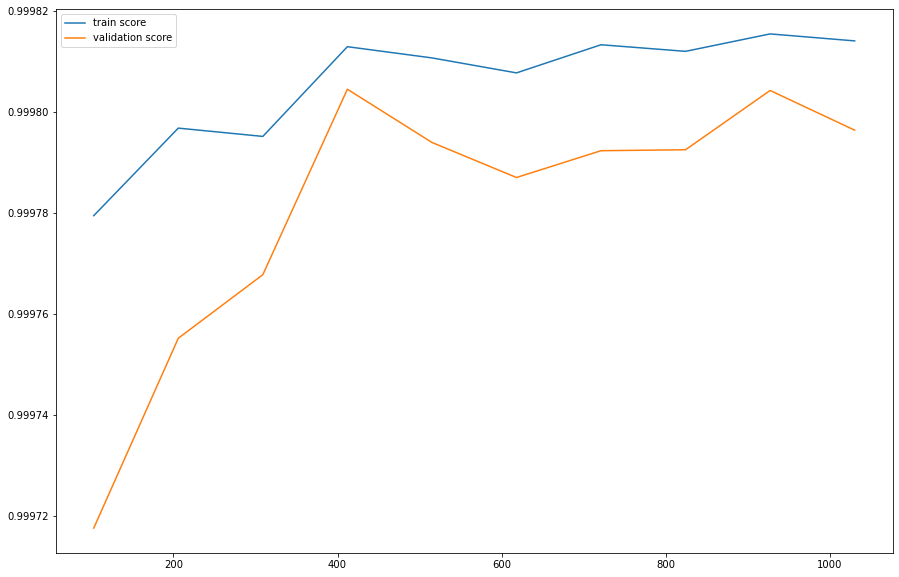

In [126]:
print("LASSO")
evaluation(model_1)

RIDGE
RMSE : 0.0034268961170282617
R2 SCORE : 0.9999941901706306


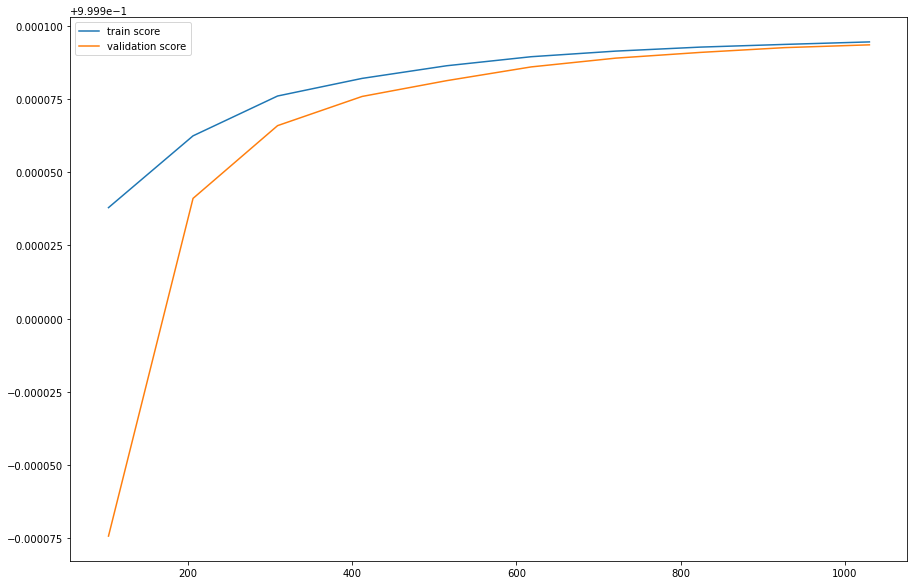

In [129]:
print("RIDGE")
evaluation(model_2)

REGRESSION LINEARE
RMSE : 5.201810445272647e-15
R2 SCORE : 1.0


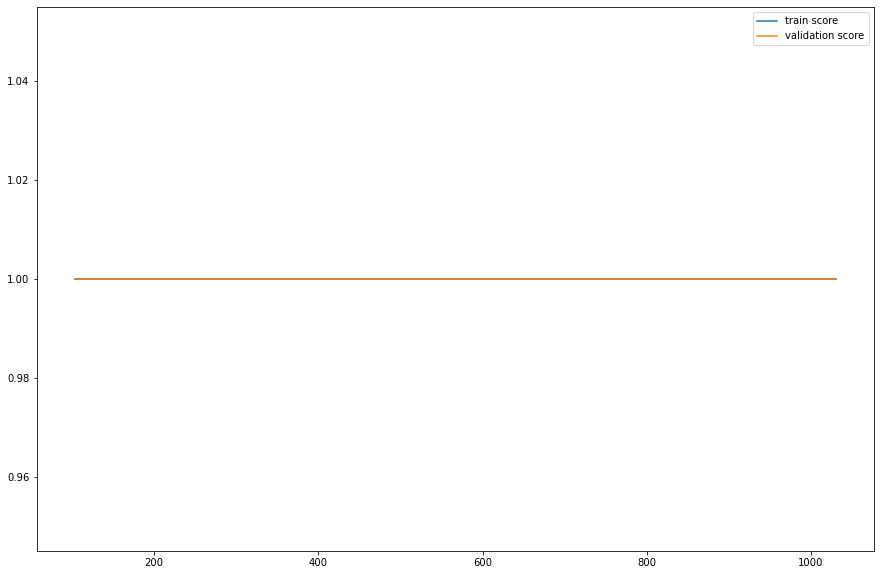

In [128]:
print("REGRESSION LINEARE")
evaluation(model_3)

Le meilleur modèle est celui du Ridge.

Normalité et Homoxédatité

In [131]:
y_pred = model_2.predict(X_test)

In [132]:
Error = y_test - y_pred

In [133]:
from scipy import stats

<function matplotlib.pyplot.show(close=None, block=None)>

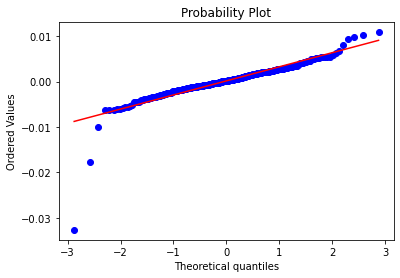

In [135]:
stats.probplot(Error, plot=plt)
plt.show

In [136]:
stats.shapiro(Error)

ShapiroResult(statistic=0.821461021900177, pvalue=3.217156141341905e-19)

La p_value qui tend vers 0 est inférieur au seuil par conséquent l'erreur ne suit pas une loi normale.

<function matplotlib.pyplot.show(close=None, block=None)>

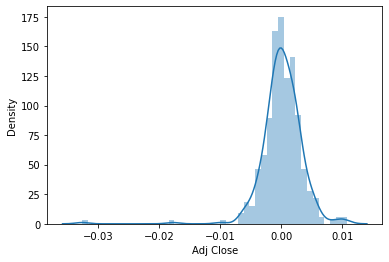

In [137]:
sns.distplot(Error, kde=True)
plt.show